In [1]:
# This file is intended to store NCVS analysis
# Add any necessary modules here
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Reading in data from clean csv - DO NOT EDIT
ncvs_csv_path = "../DataCleaning/NCVS_Clean"
ncvs_df = pd.read_csv(ncvs_csv_path)
ncvs_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

DowJones_csv_path = "../DataCleaning/DowJones_Clean"
DowJones_df = pd.read_csv(DowJones_csv_path)
DowJones_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_csv_path = "../DataCleaning/group_ager_df"
group_ager_df = pd.read_csv(ager_csv_path)
group_ager_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

newcrime_csv_path = "../DataCleaning/group_newcrime_df"
group_newcrime_df = pd.read_csv(newcrime_csv_path)
group_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_newcrime_csv_path = "../DataCleaning/group_ager_newcrime_df"
group_ager_newcrime_df = pd.read_csv(ager_newcrime_csv_path)
group_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

year_ager_newcrime_csv_path = "../DataCleaning/group_year_ager_newcrime_df"
group_year_ager_newcrime_df = pd.read_csv(year_ager_newcrime_csv_path)
group_year_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

# Merging on year - Must specifify age group and crime group to get a row for each year
# choice_full_df = full_df.loc[(full_df["ager"] == "<VALUE>") & (full_df["newcrime"] == "<VALUE>")]
full_df = group_year_ager_newcrime_df.merge(DowJones_df, left_on = "year", right_on = "Year")

In [3]:
ncvs_df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,1996,3451.43740,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,...,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,Other location
1,1996,2377.30718,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$25,000 to $34,999",Not a place,...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
2,1996,2687.23144,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999","Under 100,000",...,"Yes, reported to the police",Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
3,1996,2555.83758,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$50,000 to $74,999","100,000 to 249,999",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1996,3017.36110,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never Married,"$15,000 to $24,999","Under 100,000",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [4]:
DowJones_df

,Year,First Open,Last Close,Average Close,Year Change,Percent Change,Avg Daily Change/Volatility
0,1992,3152.10,3301.11,3284.08,149.01,4.73%,0.501%
1,1993,3301.10,3754.09,3524.92,452.99,13.72%,0.408%
2,1994,3754.10,3834.44,3794.22,80.34,2.14%,0.515%
3,1995,3834.40,5117.12,4494.28,1282.72,33.45%,0.422%
4,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
5,1997,6447.50,7908.30,7447.01,1460.80,22.66%,0.857%
6,1998,7910.20,9181.43,8630.76,1271.23,16.07%,0.884%
7,1999,9184.01,11497.12,10481.56,2313.11,25.19%,0.783%
8,2000,11501.85,10787.99,10729.38,-713.86,-6.21%,0.988%
9,2001,10790.92,10021.57,10208.86,-769.35,-7.13%,0.967%


In [5]:
group_ager_df

,ager,count,proportion
0,12 to 14,4424,0.094008
1,15 to 17,3975,0.084467
2,18 to 20,4081,0.086719
3,21 to 24,4568,0.097068
4,25 to 34,9770,0.207607
5,35 to 49,11781,0.250340
6,50 to 64,6614,0.140544
7,65 or older,1847,0.039248


In [6]:
group_newcrime_df

,newcrime,count,proportion
0,Personal theft/larceny,1489,0.03164
1,Violent victimization,45571,0.96836


In [7]:
group_ager_newcrime_df

,ager,newcrime,count,proportion,count_age,proportion_age
0,12 to 14,Personal theft/larceny,107,0.002274,4424,0.024186
1,12 to 14,Violent victimization,4317,0.091734,4424,0.975814
2,15 to 17,Personal theft/larceny,103,0.002189,3975,0.025912
3,15 to 17,Violent victimization,3872,0.082278,3975,0.974088
4,18 to 20,Personal theft/larceny,112,0.002380,4081,0.027444
5,18 to 20,Violent victimization,3969,0.084339,4081,0.972556
6,21 to 24,Personal theft/larceny,126,0.002677,4568,0.027583
7,21 to 24,Violent victimization,4442,0.094390,4568,0.972417
8,25 to 34,Personal theft/larceny,259,0.005504,9770,0.026510
9,25 to 34,Violent victimization,9511,0.202104,9770,0.973490


In [8]:
group_year_ager_newcrime_df

,year,ager,newcrime,count,proportion,count_year,proportion_year,count_year_ager,proportion_year_ager
0,1996,12 to 14,Personal theft/larceny,19,0.000404,3748,0.005069,490,0.038776
1,1996,12 to 14,Violent victimization,471,0.010008,3748,0.125667,490,0.961224
2,1996,15 to 17,Personal theft/larceny,9,0.000191,3748,0.002401,430,0.020930
3,1996,15 to 17,Violent victimization,421,0.008946,3748,0.112327,430,0.979070
4,1996,18 to 20,Personal theft/larceny,11,0.000234,3748,0.002935,367,0.029973
...,...,...,...,...,...,...,...,...,...
371,2019,35 to 49,Violent victimization,538,0.011432,2242,0.239964,546,0.985348
372,2019,50 to 64,Personal theft/larceny,13,0.000276,2242,0.005798,514,0.025292
373,2019,50 to 64,Violent victimization,501,0.010646,2242,0.223461,514,0.974708
374,2019,65 or older,Personal theft/larceny,9,0.000191,2242,0.004014,182,0.049451


In [9]:
full_df

# Use this as an example
# full_df.loc[(full_df["ager"] == "18 to 20") & (full_df["newcrime"] == "Personal theft/larceny")]

,year,ager,newcrime,count,proportion,count_year,proportion_year,count_year_ager,proportion_year_ager,Year,First Open,Last Close,Average Close,Year Change,Percent Change,Avg Daily Change/Volatility
0,1996,12 to 14,Personal theft/larceny,19,0.000404,3748,0.005069,490,0.038776,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
1,1996,12 to 14,Violent victimization,471,0.010008,3748,0.125667,490,0.961224,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
2,1996,15 to 17,Personal theft/larceny,9,0.000191,3748,0.002401,430,0.020930,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
3,1996,15 to 17,Violent victimization,421,0.008946,3748,0.112327,430,0.979070,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
4,1996,18 to 20,Personal theft/larceny,11,0.000234,3748,0.002935,367,0.029973,1996,5115.70,6448.27,5739.63,1332.57,26.05%,0.573%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2019,35 to 49,Violent victimization,538,0.011432,2242,0.239964,546,0.985348,2019,23058.61,28538.44,26379.54,5479.83,23.76%,0.421%
372,2019,50 to 64,Personal theft/larceny,13,0.000276,2242,0.005798,514,0.025292,2019,23058.61,28538.44,26379.54,5479.83,23.76%,0.421%
373,2019,50 to 64,Violent victimization,501,0.010646,2242,0.223461,514,0.974708,2019,23058.61,28538.44,26379.54,5479.83,23.76%,0.421%
374,2019,65 or older,Personal theft/larceny,9,0.000191,2242,0.004014,182,0.049451,2019,23058.61,28538.44,26379.54,5479.83,23.76%,0.421%


<IPython.core.display.Javascript object>


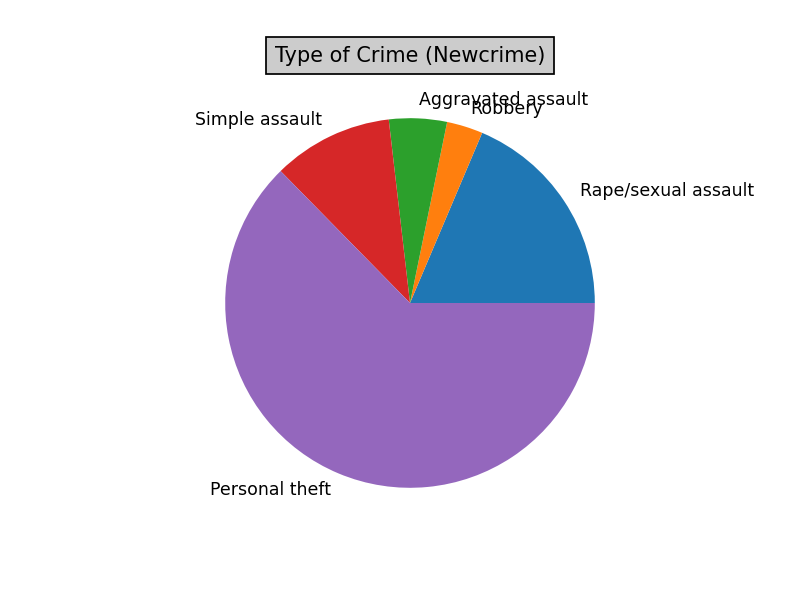

Text(0.5, 1.0, 'Type of Crime (Newcrime)')

In [10]:
# Pie Chart "Type of Crime"
g_one = plt.figure(1)
newoff_df = ncvs_df.groupby("newoff").count()
newoff_labels = ["Rape/sexual assault", "Robbery", "Aggravated assault", "Simple assault", "Personal theft"]
newoff_df = newoff_df["year"].tolist()
plt.pie(newoff_df, labels=newoff_labels)
plt.title("Type of Crime (Newcrime)", bbox={'facecolor':'0.8', 'pad':5})
#plt.show()

<IPython.core.display.Javascript object>


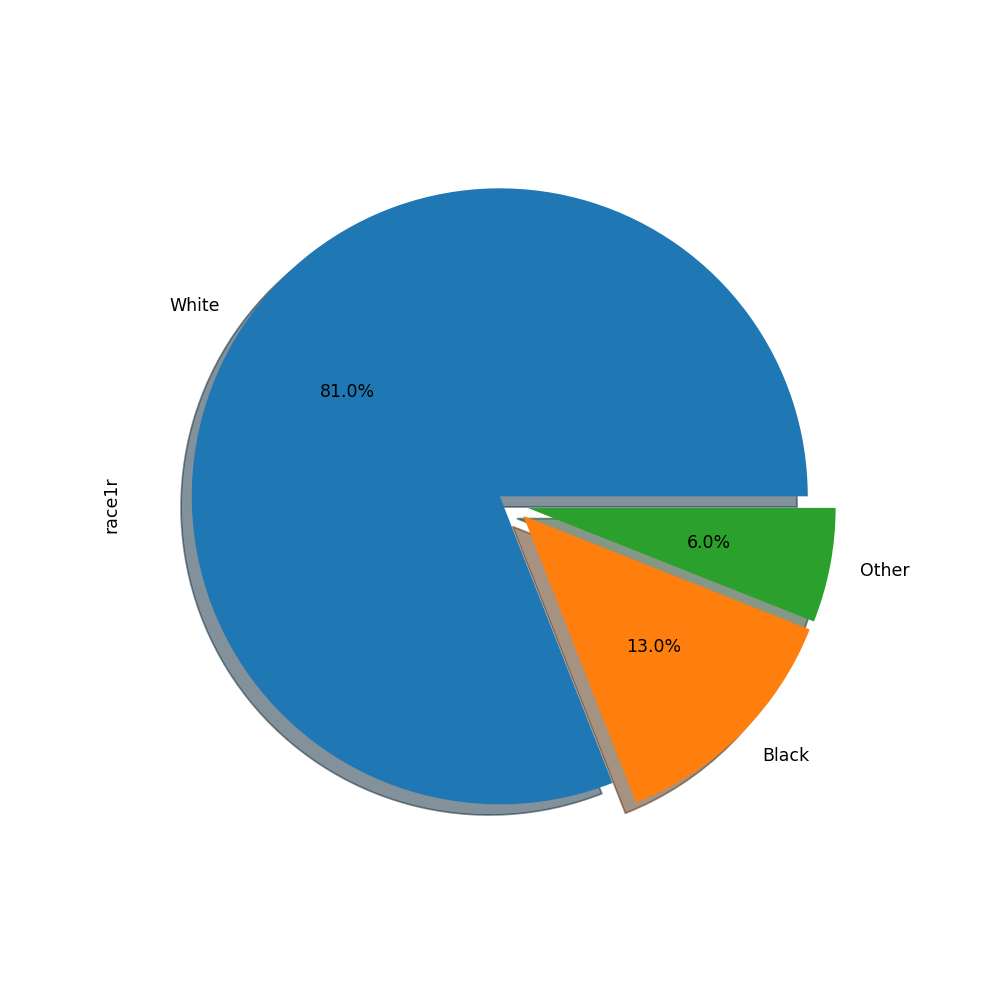

<AxesSubplot:ylabel='race1r'>

In [11]:
#Pie Chart 2: "Race"
graph_two = plt.figure(2)
race = ncvs_df["race1r"].value_counts()
ncvs_df['race1r'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
#plt.show()

<IPython.core.display.Javascript object>


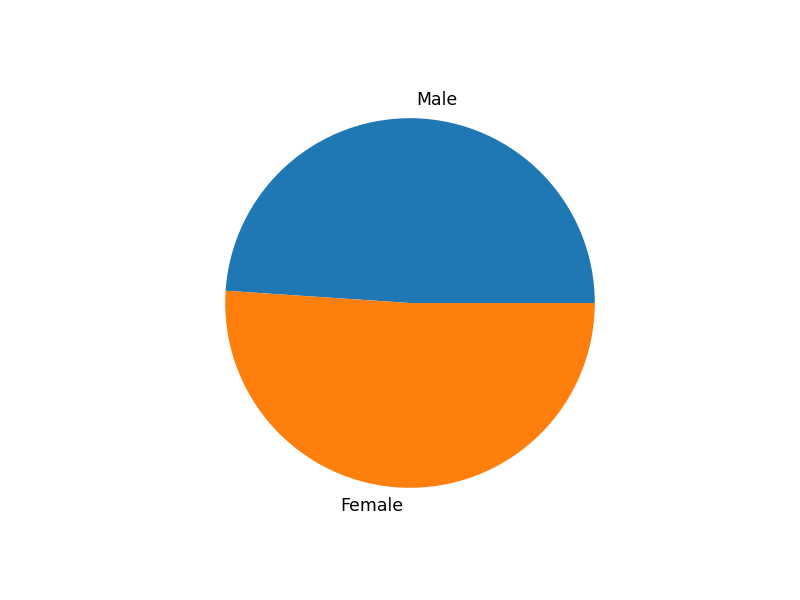

([<matplotlib.patches.Wedge at 0x229131f63d0>,
 [Text(0.03641607271329161, 1.099397048226045, 'Male'),
  Text(-0.03641617564627213, -1.0993970448165213, 'Female')])

In [12]:
# Pie Chart 1:  "Gender"
graph_three = plt.figure(3)
gender_vic = ncvs_df.groupby('gender')
gender_group = gender_vic.count()
labels = ["Male", "Female"]
gender_count = gender_group["year"].tolist()
plt.pie(gender_count, labels=labels)
#plt.show()

<IPython.core.display.Javascript object>


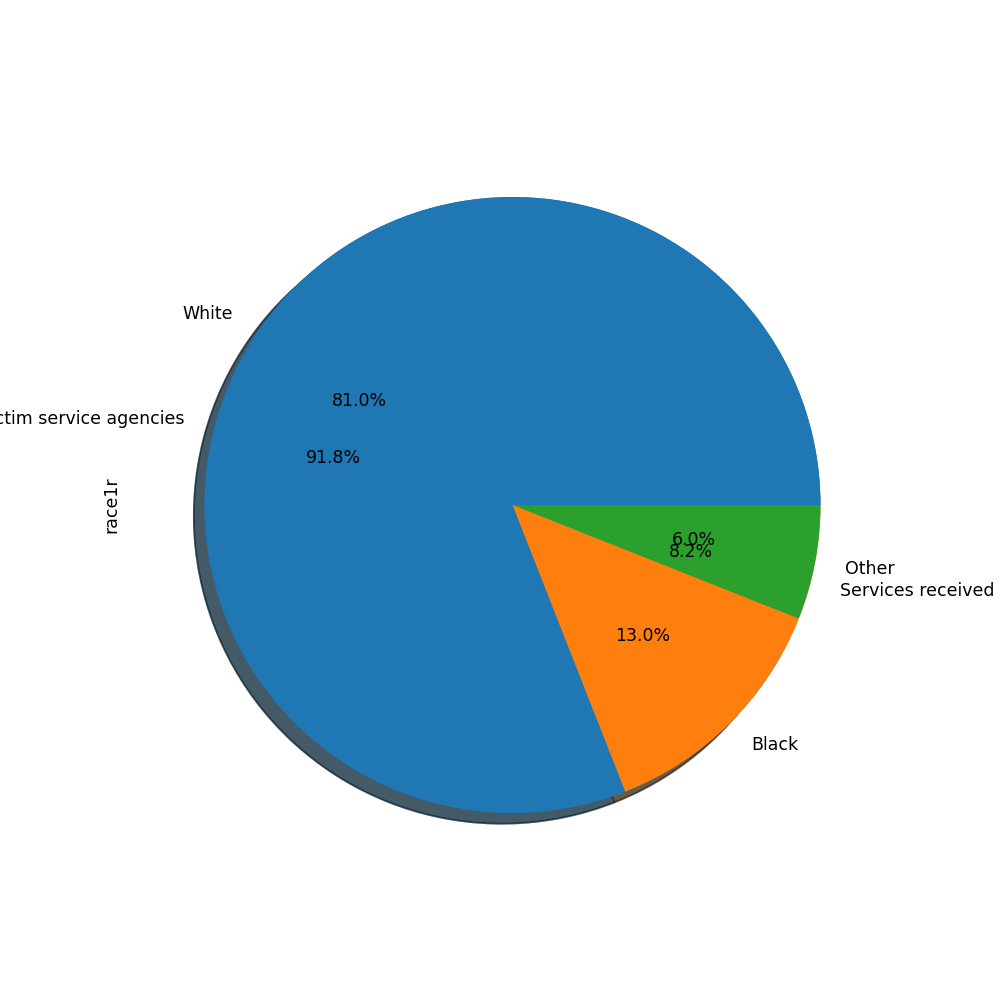

<AxesSubplot:ylabel='race1r'>

In [13]:
#Pie Chart 2: "Victim Services"
graph_four = plt.figure(4)
vic_serv = ncvs_df["vicservices"].value_counts()
ncvs_df['vicservices'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
ncvs_df['race1r'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(8,8))
#plt.show()

<IPython.core.display.Javascript object>


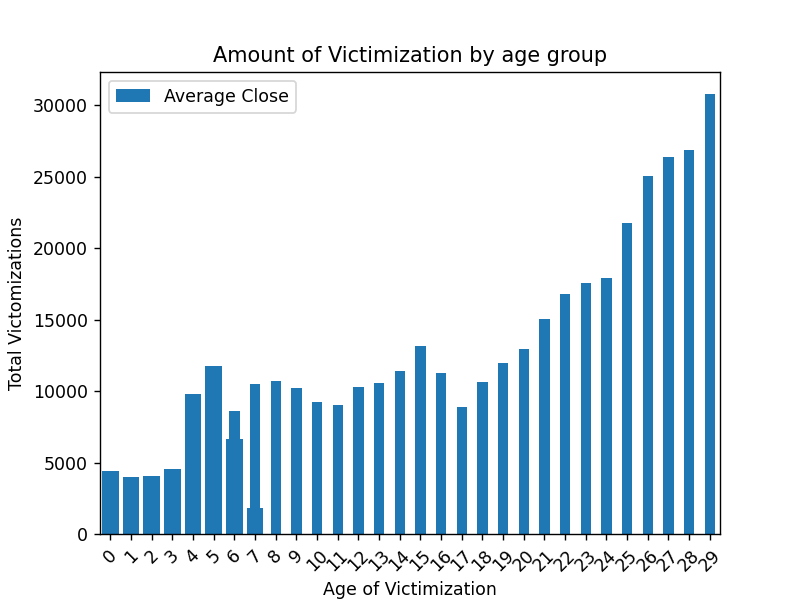

In [14]:
avgclose_bar = DowJones_df[["Average Close"]].plot(kind="bar")
#plt.show()

In [15]:
graph_five= plt.figure(5)
age_vic = ncvs_df.groupby("ager")
crime_age_vic = age_vic["newcrime"].count()
crime_age_vic_list = crime_age_vic.values.tolist()
ages_list = ["12 to 14","15 to 17","18 to 20","21 to 24","25 to 34","35 to 49","50 to 64","65 or older"]
plt.bar(ages_list, crime_age_vic_list)
plt.title("Amount of Victimization by age group")
plt.xlabel("Age of Victimization")
plt.ylabel("Total Victomizations")
plt.xticks(rotation=45)
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

<IPython.core.display.Javascript object>


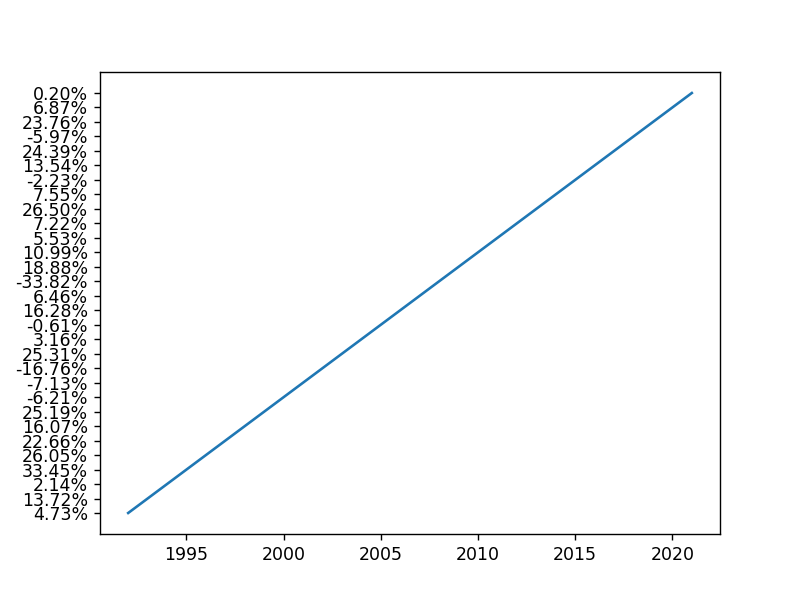

In [17]:
stock_graph = plt.figure(6)
plt.plot(DowJones_df['Year'],DowJones_df['Percent Change'])
plt.show()